Итоговая работа по курсу «Feature engineering и предобработка данных»

1.Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте
2.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3.Выбрать стратегию для работы с пропущенными значениями.
4.Рассчитать и визуализировать корреляционную матрицу для переменных.
5.Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
6.С помощью статистических методов проверить взаимосвязи между переменными.
7.Сгенерировать новые переменные (фичи)
8.Попробовать отобрать наиболее важные переменные (сделать Feature Selection)
9.Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10.Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11.Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [6]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
from scipy.stats import pearsonr


data = pd.read_csv('data_breast_3.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
#data.columns.values.tolist()

In [42]:
#Удалю лишние столбцы:
collist = data.columns.values.tolist()
collist.remove('id')
data_1 = data[collist[0:11]]
#data_1.head()

In [41]:
data_1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [44]:
# Diagnosis (M = malignant, B = benign//М = злокачественная, В = доброкачественная)
# Переведем текстовые данные в числовые значения

diagnosis_number = data_1['diagnosis']
def diagnosis_(x):
        if x =='M':
            return 1
        elif x == 'B':
            return 0
        return 0
data_1['diagnosis_number'] = data_1['diagnosis'].apply(diagnosis_)
data_2 = data_1.drop('diagnosis', axis=1)
data_2.head()

/Users/tanyamak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_number
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


## 2. Статистические показатели для переменны

In [45]:
data_2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_number
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


In [48]:
data_1.select_dtypes(include='object').mode()

,diagnosis
0,B


In [49]:
data_2.select_dtypes(include='object').median()

Series([], dtype: float64)

## 3. Работа с пропущенными значениями

In [50]:
data_2.isnull().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
diagnosis_number          0
dtype: int64

In [52]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis_number          569 non-null int64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


Пропущенных значений нет

## 4. Корреляционная матрицу переменных

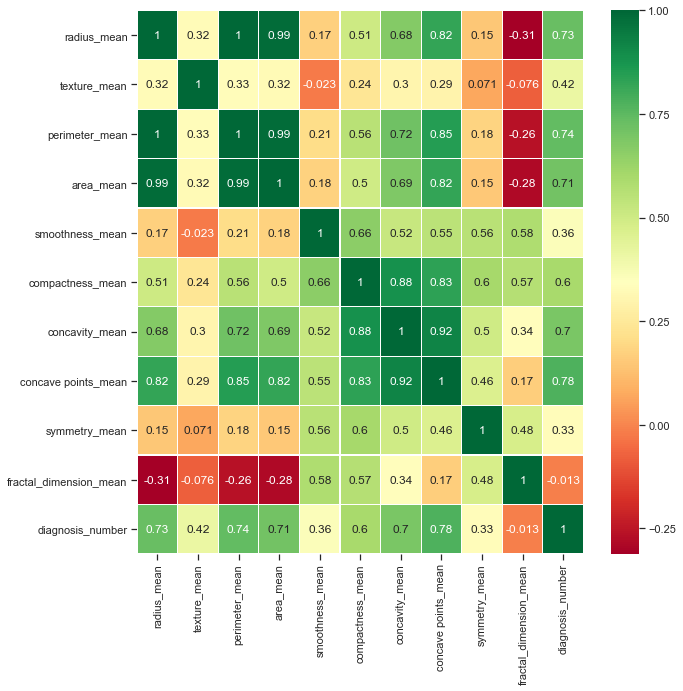

In [53]:
import seaborn as sns
sns.heatmap(data_2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Как видно из матрицы корреляций, существует абсолютная корреляция между параметрами 'radius_mean' и 'perimeter_mean', 'area_mean' - поэтому для расчета модели используем только один из параметров - perimeter_mean - у данного параметра наибольшая корреляция Пирсона в двумя другими параметрами

Очень высокая корреляция между параметрами - 'concavity_mean' и 'concave points_mean'. В модель предсказания 'diagnosis_number' включим один их двух предыдущих параметров - 'concave points_mean' - так как он сильнее коррелирует со значением 'diagnosis_number'. Так же по той же причине можно удалить 'compactness_mean' (но здесь лучше проверить как изменяется качество модели)

## 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы)

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

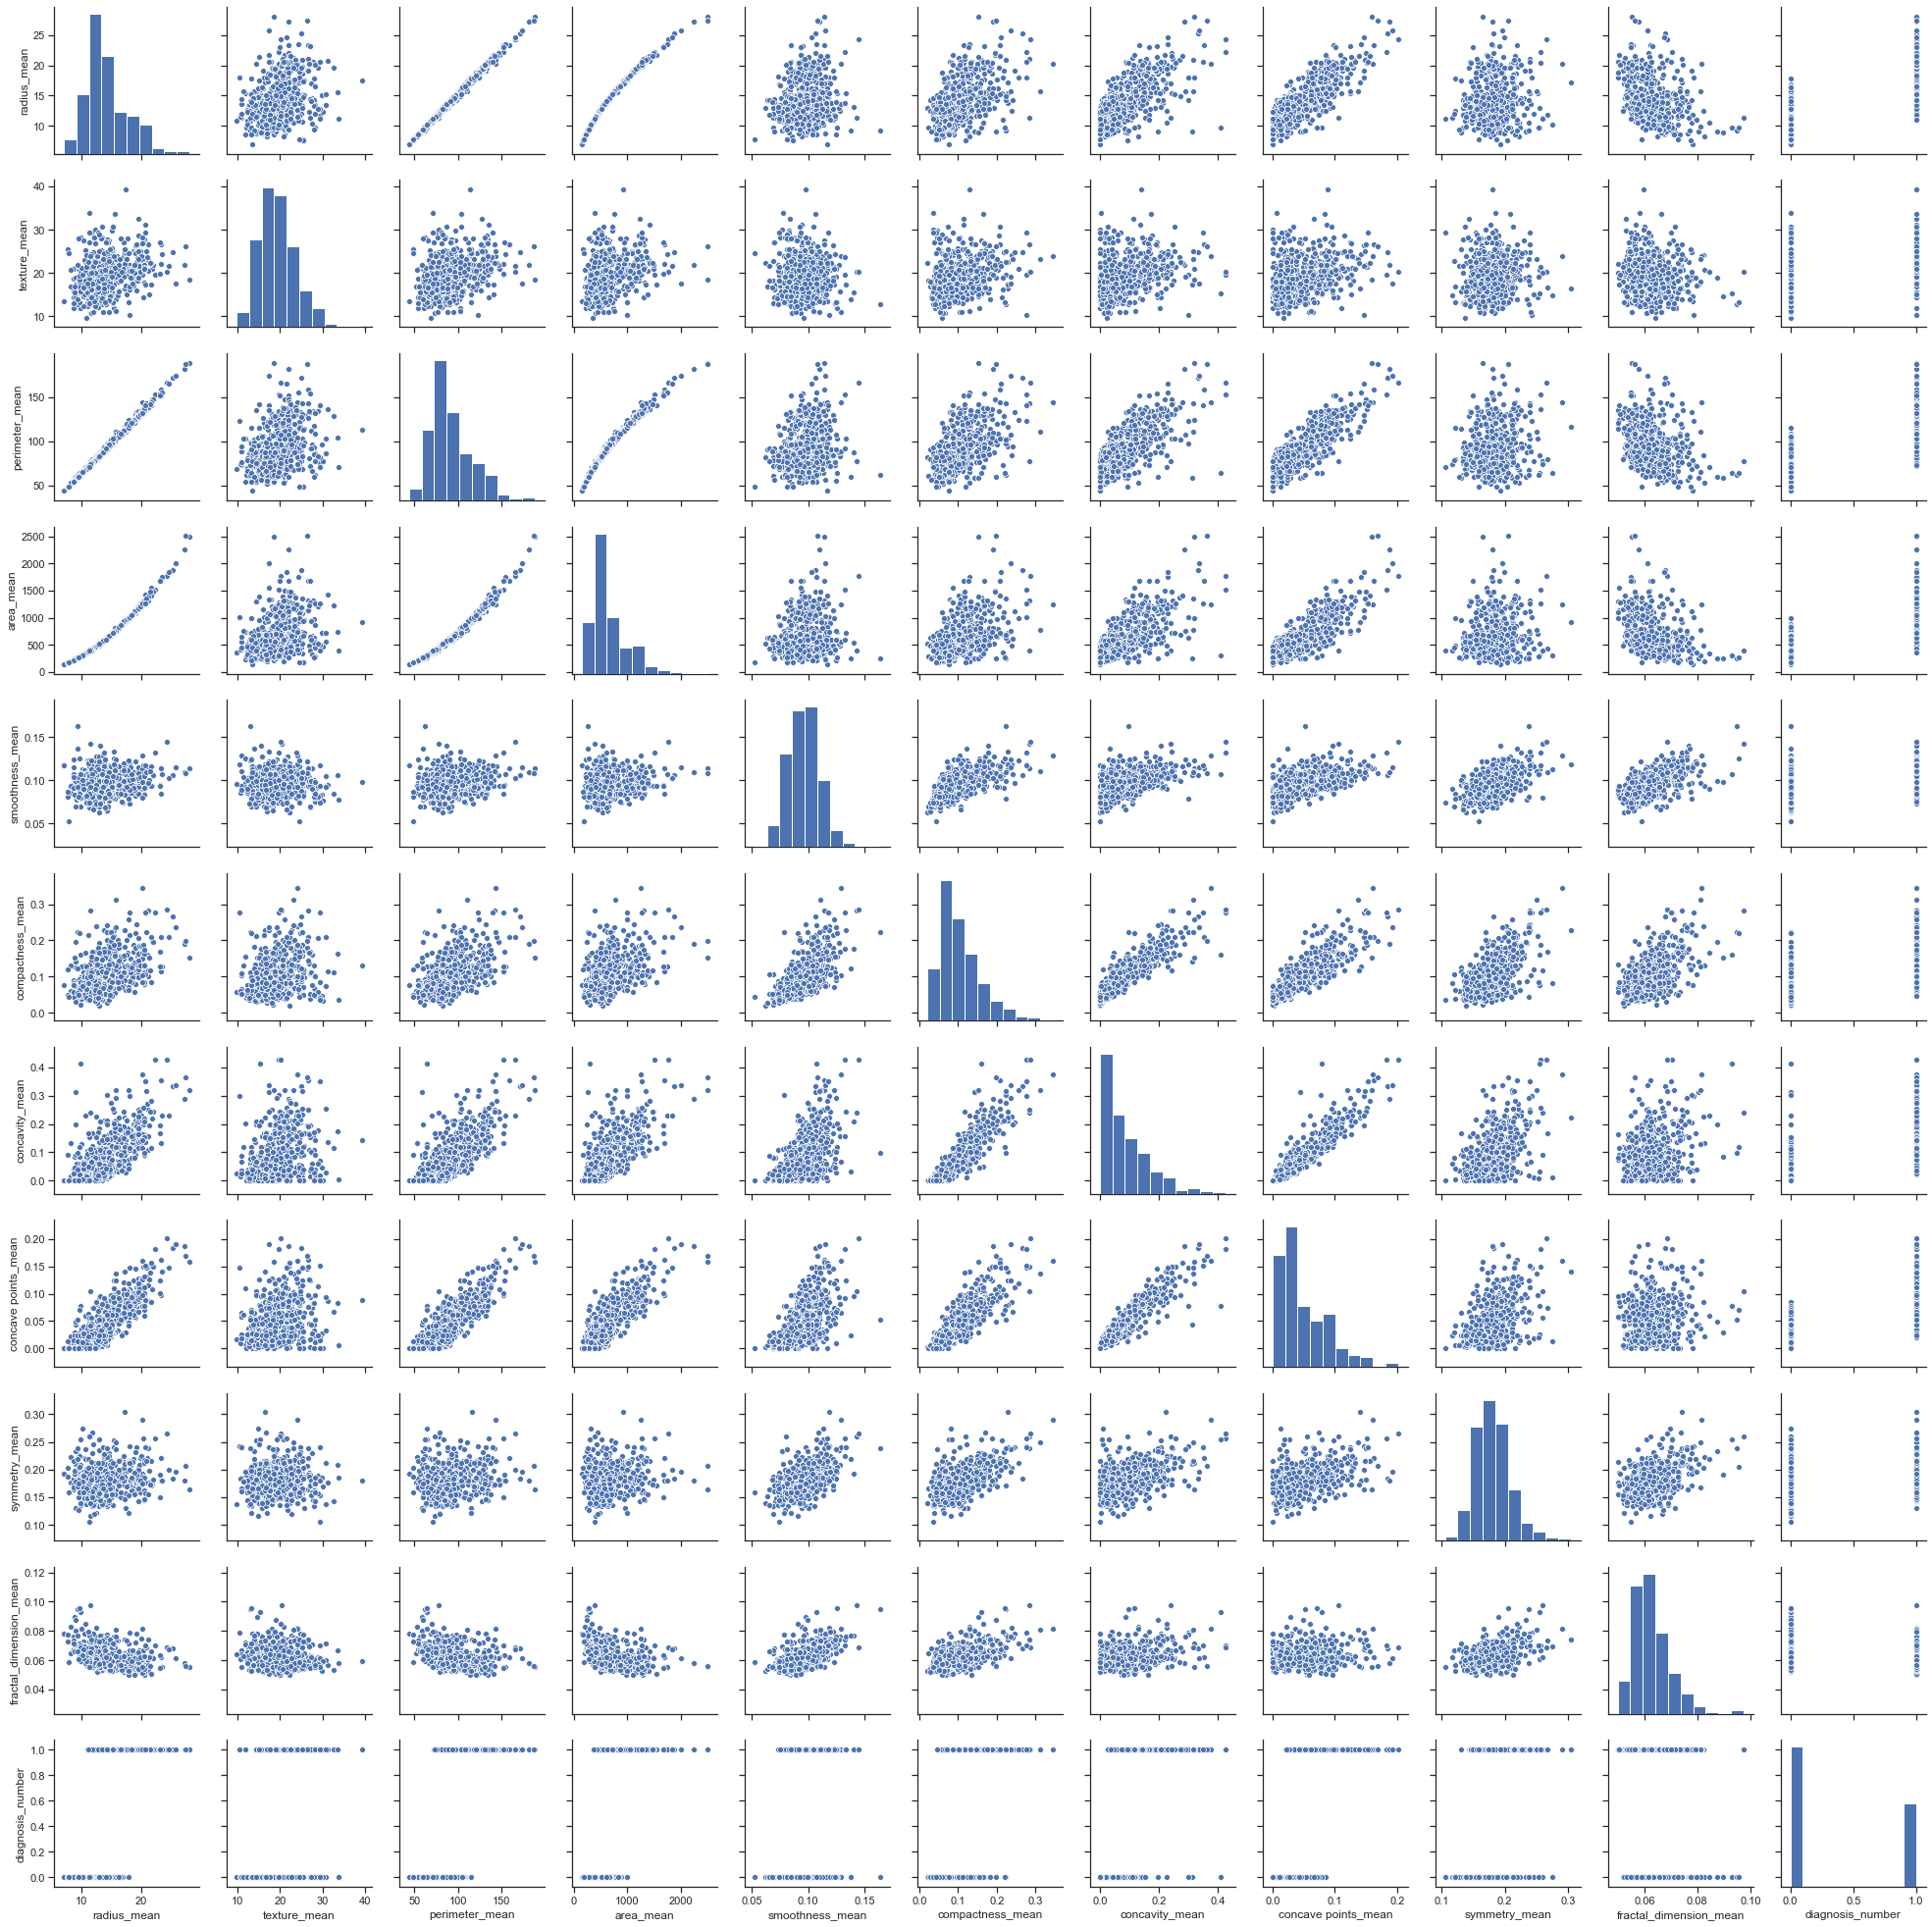

In [54]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_2)
sns.set

Как видно по графикам выше, все параметры распределены примерно нормально, кроме объясняемой переменной 'diagnosis_number'
Между большинством переменных сущетсвует сильная линейная зависимость

## 6. С помощью статистических методов проверить взаимосвязи между переменными

### 6.1 Проверим гипотезу том, что люди с диагнозом 1 (malignant = злокачественная опухоль) и 0 (benign = доброкачественная опухоль) имеют одинковый радиус опухоли, то есть радиус опухоли не определяет ее качество

In [58]:
diagnosis_number = data_2['diagnosis_number']
malignant_radius = data_2[diagnosis_number==1]['radius_mean']
benign_radius = data_2[diagnosis_number==0]['radius_mean']
len(malignant_radius), len(benign_radius)

(212, 357)

In [59]:
# проверим, похожи ли коэффициенты дисперсии в выборка, чтобы мы могли использовать p-value
malignant_radius_2 = malignant_radius.sample(212)
benign_radius_2 = benign_radius.sample(212)
statistics.variance(malignant_radius_2), statistics.variance(benign_radius_2)

(10.26543081462935, 3.1004883176920326)

In [62]:
stats.ttest_ind(malignant_radius_2, benign_radius_2, equal_var=False)

Ttest_indResult(statistic=21.431230950478128, pvalue=2.563891917773421e-64)

Так как значение p-value очень маленькое (меньше 0.5), мы отвергаем нашу гипотезу и можем говорить о том, что радиус опухоли может сигнализировать о ее качестве

### 6.2 Проверим гипотезу том, что люди с диагнозом 1 (malignant = злокачественная опухоль) и 0 (benign = доброкачественная опухоль) имеют одинковый показатель  texture (standard deviation of gray-scale values) , то есть "серости" опухоли не определяет ее качество¶

In [64]:
malignant_texture = data_2[diagnosis_number==1]['texture_mean']
benign_texture = data_2[diagnosis_number==0]['texture_mean']
#len(malignant_texture), len(benign_texture)
# проверим, похожи ли коэффициенты дисперсии в выборка, чтобы мы могли использовать p-value
malignant_texture_2 = malignant_texture.sample(212)
benign_texture_2 = benign_texture.sample(212)
statistics.variance(malignant_texture_2), statistics.variance(benign_texture_2)

(14.284392882053117, 18.0892865487794)

In [65]:
stats.ttest_ind(malignant_radius_2, benign_radius_2, equal_var=False)

Ttest_indResult(statistic=21.431230950478128, pvalue=2.563891917773421e-64)

Так как значение p-value очень маленькое (меньше 0.5), мы отвергаем нашу гипотезу и можем говорить о том, что "серость" опухоли может сигнализировать о ее качестве

### 6.3 Проверим гипотезу том, что люди с диагнозом 1 (malignant = злокачественная опухоль) и 0 (benign = доброкачественная опухоль) имеют одинковый показатель smoothness (local variation in radius lengths) , то есть "локальное изменение длины радиуса" опухоли не определяет ее качество¶

In [67]:
malignant_smoothness = data_2[diagnosis_number==1]['smoothness_mean']
benign_smoothness = data_2[diagnosis_number==0]['smoothness_mean']
#len(malignant_smoothness), len(benign_smoothness)
#проверим, похожи ли коэффициенты дисперсии в выборка, чтобы мы могли использовать p-value
malignant_smoothness_2 = malignant_smoothness.sample(212)
benign_smoothness_2 = benign_smoothness.sample(212)
statistics.variance(malignant_smoothness_2), statistics.variance(benign_smoothness_2)

(0.00015896760245014753, 0.0001774200912523473)

In [68]:
stats.ttest_ind(malignant_radius_2, benign_radius_2, equal_var=True)

Ttest_indResult(statistic=21.431230950478128, pvalue=1.7768862269980219e-69)

Так как значение p-value очень маленькое (меньше 0.5), мы отвергаем нашу гипотезу и можем говорить о том, что "локальное изменение длины радиуса" опухоли может сигнализировать о ее качестве

## 7. Создание новых переменных

In [74]:
# Первая собственная переменная - savings_chance (уровень выживаемости)
n_samples = 569
health_degree = np.random.choice(5, n_samples) + 1
weigth = np.random.choice(120, n_samples) + 3
savings_chance = health_degree + weigth*0.3
data_2['savings_chance']=pd.DataFrame({'savings_chance': savings_chance})
data_2.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_number,savings_chance,chance_get_helped
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1,23.5,28.9
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1,24.3,35.4
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1,12.2,37.9
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1,16.4,28.9
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1,20.5,38.1


In [76]:
# Вторая собственная переменная - chance_get_helped (шансы дождаться помощи)
n_samples = 569
wealth_range = np.random.choice(5, n_samples) + 1
important_connections = np.random.choice(3, n_samples) + 1
chance_get_helped = wealth_range*0.5 + important_connections*0.5
data_2['chance_get_helped']=pd.DataFrame({'chance_get_helped': savings_chance})
data_2.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_number,savings_chance,chance_get_helped
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1,23.5,23.5
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1,24.3,24.3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1,12.2,12.2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1,16.4,16.4
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1,20.5,20.5


## 8. Отобрать наиболее важные переменные (сделать Feature Selection)

По матрице корреляций я уже делала следующие выводы о том, какие переменные моно исключить из модели:

Как видно из матрицы корреляций, существует абсолютная корреляция между параметрами 'radius_mean' и 'perimeter_mean', 'area_mean' - поэтому для расчета модели используем только один из параметров - perimeter_mean - у данного параметра наибольшая корреляция Пирсона в двумя другими параметрами

Очень высокая корреляция между параметрами - 'concavity_mean' и 'concave points_mean'. В модель предсказания 'diagnosis_number' включим один их двух предыдущих параметров - 'concave points_mean' - так как он сильнее коррелирует со значением 'diagnosis_number'. Так же по той же причине можно удалить 'compactness_mean'


In [91]:
data_3 = data_2.drop('radius_mean', axis=1)
data_3 = data_3.drop('area_mean', axis=1)
data_3 = data_3.drop('concavity_mean', axis=1)
data_3.head()
#data_3.shape
#data_2.shape

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_number,savings_chance,chance_get_helped
0,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871,1,23.5,23.5
1,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667,1,24.3,24.3
2,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999,1,12.2,12.2
3,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744,1,16.4,16.4
4,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883,1,20.5,20.5


## 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса

### 9.1 Построим логистическую регресиию используя классическое разделение обучаемой и тестовой выборки - 70/30

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
X = data_train_6[['Pclass', 'Age', 'SibSp','Parch','Fare','Sex_class','savings_chance','indurance_chance']]
y = data_train_6['Survived']

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

### 9.2 Построим модель используя инструмент "Случайный лес"

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=714, n_features=8,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X, y))

Значимость признаков:  [0.2134867  0.40453794 0.07856409 0.06716542 0.05924088 0.04939725
 0.08051252 0.04709521]
Точность модели: 0.8935574229691877


## 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall